In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

In [2]:
df=read_csv('C:/Users/Admin/Downloads/nse.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5559.299805,0.0
1,2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5351.000000,0.0
2,2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5215.299805,0.0
3,2007-10-22,5202.750000,5247.399902,5070.899902,5184.000000,5184.000000,0.0
4,2007-10-23,5185.299805,5488.500000,5176.850098,5473.700195,5473.700195,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4032 non-null   object 
 1   Open       4000 non-null   float64
 2   High       4000 non-null   float64
 3   Low        4000 non-null   float64
 4   Close      4000 non-null   float64
 5   Adj Close  4000 non-null   float64
 6   Volume     4000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 220.6+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.index.freq='D'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4032 non-null   datetime64[ns]
 1   Open       4000 non-null   float64       
 2   High       4000 non-null   float64       
 3   Low        4000 non-null   float64       
 4   Close      4000 non-null   float64       
 5   Adj Close  4000 non-null   float64       
 6   Volume     4000 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 220.6 KB


In [7]:
df.drop(columns=['Open', 'High','Low','Adj Close','Volume'], inplace=True)


In [8]:
df.info()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4032 non-null   datetime64[ns]
 1   Close   4000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


<Axes: xlabel='Date'>

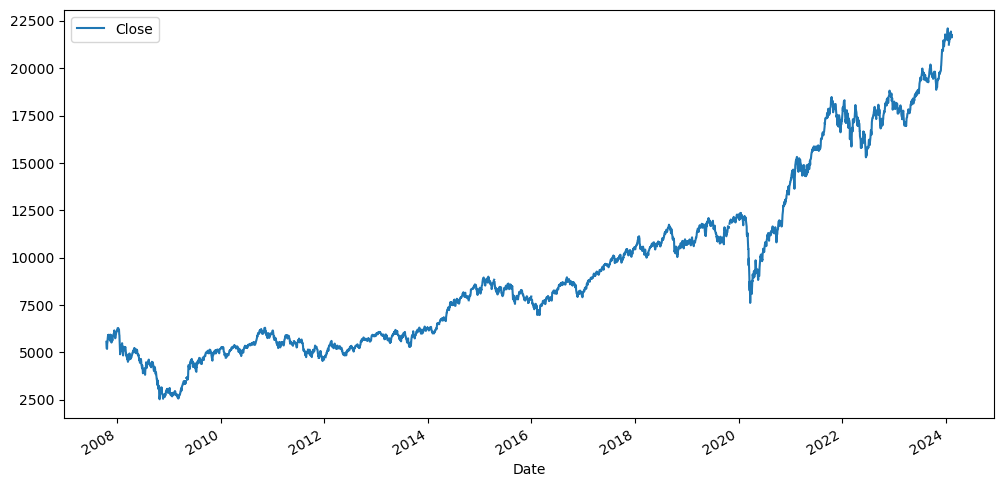

In [9]:
df.plot(figsize=(12,6))

In [10]:
# Check for missing values
# Find the total number of missing values
total = df.isnull().sum().sort_values(ascending = False)
print(total)

Close    32
dtype: int64


In [11]:
# Assuming df is your DataFrame with a time series index
# Forward fill missing values
df = df.fillna(method='ffill')

# Print the DataFrame with missing values filled
print("DataFrame with missing values filled using forward fill:")
print(df)


DataFrame with missing values filled using forward fill:
                   Close
Date                    
2007-10-17   5559.299805
2007-10-18   5351.000000
2007-10-19   5215.299805
2007-10-22   5184.000000
2007-10-23   5473.700195
...                  ...
2024-02-07  21930.500000
2024-02-08  21717.949219
2024-02-09  21782.500000
2024-02-12  21616.050781
2024-02-13  21743.250000

[4032 rows x 1 columns]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2007-10-17 to 2024-02-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [13]:
# Check for missing values
# Find the total number of missing values
total = df.isnull().sum().sort_values(ascending = False)
print(total)

Close    0
dtype: int64


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


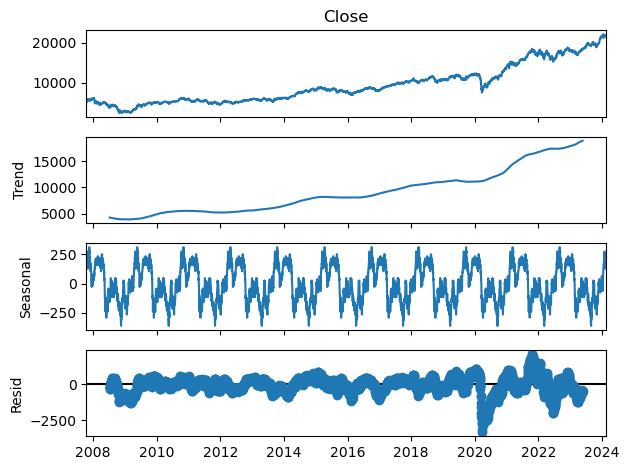

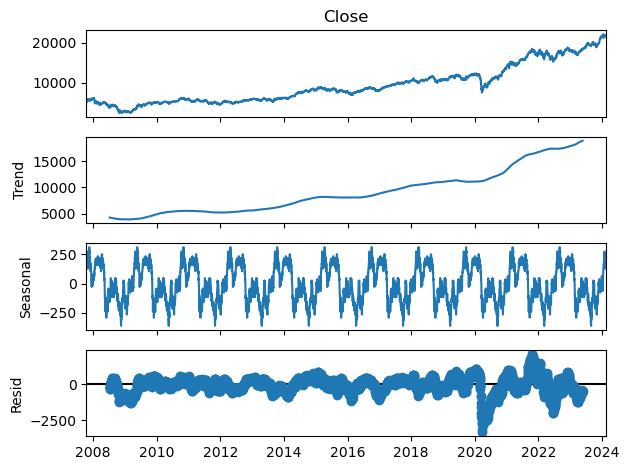

In [15]:
# Assuming df is your DataFrame with a DateTimeIndex
# Perform seasonal decomposition
results = seasonal_decompose(df['Close'], period=365)  # Specify the period as 12, adjust as per your data

# Plot the decomposition
results.plot()

In [15]:
len(df)

4032

In [16]:
int(len(df)*0.8)

3225

In [17]:
train = df.iloc[:3225]
test = df.iloc[3225:]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
df.head(),df.tail()
     

(                  Close
 Date                   
 2007-10-17  5559.299805
 2007-10-18  5351.000000
 2007-10-19  5215.299805
 2007-10-22  5184.000000
 2007-10-23  5473.700195,
                    Close
 Date                    
 2024-02-07  21930.500000
 2024-02-08  21717.949219
 2024-02-09  21782.500000
 2024-02-12  21616.050781
 2024-02-13  21743.250000)

In [20]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
     

In [21]:
scaled_train[:30]

array([[0.30029979],
       [0.27969013],
       [0.26626364],
       [0.26316676],
       [0.29183037],
       [0.29405159],
       [0.30125462],
       [0.31444854],
       [0.33459321],
       [0.33091751],
       [0.33407376],
       [0.33068996],
       [0.33721518],
       [0.32879518],
       [0.3227795 ],
       [0.3223689 ],
       [0.31409732],
       [0.30601869],
       [0.31376585],
       [0.33775936],
       [0.33520667],
       [0.33468722],
       [0.33476635],
       [0.32222542],
       [0.30047294],
       [0.29634707],
       [0.30517768],
       [0.31735748],
       [0.31403794],
       [0.30606318]])

In [22]:
#pip install keras

In [23]:
#!pip install tensorflow


In [24]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# define generator
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
     

Given the Array: 
[0.30029979 0.27969013 0.26626364 0.26316676 0.29183037 0.29405159
 0.30125462 0.31444854 0.33459321 0.33091751 0.33407376 0.33068996
 0.33721518 0.32879518 0.3227795  0.3223689  0.31409732 0.30601869
 0.31376585 0.33775936 0.33520667 0.33468722 0.33476635 0.32222542
 0.30047294 0.29634707 0.30517768 0.31735748 0.31403794 0.30606318]
Predict this y: 
 [[0.30775018]]


In [26]:
X.shape

(1, 30, 1)

In [41]:

# We do the same thing, but now instead for 1 months
n_input = 10
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [42]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
     

model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:

# fit model
#model.fit(generator,epochs=5)

In [30]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50

3195/3195 [==============================] - 60s 18ms/step - loss: 0.0015
Epoch 2/50
3195/3195 [==============================] - 59s 18ms/step - loss: 3.2478e-04
Epoch 3/50
3195/3195 [==============================] - 57s 18ms/step - loss: 2.4274e-04
Epoch 4/50
3195/3195 [==============================] - 58s 18ms/step - loss: 1.7546e-04
Epoch 5/50
3195/3195 [==============================] - 58s 18ms/step - loss: 1.5961e-04
Epoch 6/50
3195/3195 [==============================] - 58s 18ms/step - loss: 1.6052e-04
Epoch 7/50
3195/3195 [==============================] - 55s 17ms/step - loss: 1.4798e-04
Epoch 8/50
3195/3195 [==============================] - 56s 17ms/step - loss: 1.3103e-04
Epoch 9/50
3195/3195 [==============================] - 58s 18ms/step - loss: 1.3387e-04
Epoch 10/50
3195/3195 [==============================] - 58s 18ms/step - loss: 1.2636e-04
Epoch 11/50
3195/3195 [==============================] - 59s 19ms/step - loss: 1.2702e-04
Epoch 12/50
3195/3195 

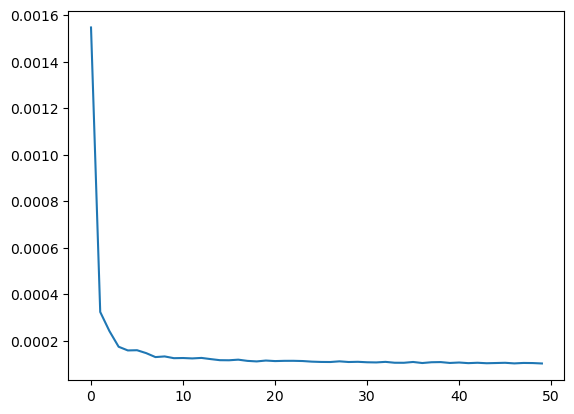

In [31]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [43]:
last_train_batch = scaled_train[-10:]
     

last_train_batch = last_train_batch.reshape((1, n_input, n_features))
     

model.predict(last_train_batch)


scaled_test[0]

1/1 [==============================] - 0s 409ms/step


array([1.01168022])

In [35]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

test_predictions

1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 56ms/step


[array([1.0026773], dtype=float32),
 array([1.0037348], dtype=float32),
 array([1.0026991], dtype=float32),
 array([1.0021983], dtype=float32),
 array([1.0020483], dtype=float32),
 array([1.0020628], dtype=float32),
 array([1.0021518], dtype=float32),
 array([1.002275], dtype=float32),
 array([1.002414], dtype=float32),
 array([1.0025609], dtype=float32),
 array([1.0027122], dtype=float32),
 array([1.0028661], dtype=float32),
 array([1.0030221], dtype=float32),
 array([1.0031798], dtype=float32),
 array([1.0033389], dtype=float32),
 array([1.0034996], dtype=float32),
 array([1.0036618], dtype=float32),
 array([1.0038253], dtype=float32),
 array([1.00399], dtype=float32),
 array([1.0041561], dtype=float32),
 array([1.0043234], dtype=float32),
 array([1.0044922], dtype=float32),
 array([1.0046624], dtype=float32),
 array([1.0048342], dtype=float32),
 array([1.0050076], dtype=float32),
 array([1.0051827], dtype=float32),
 array([1.0053598], dtype=float32),
 array([1.0055382], dtype=float3

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\2569922119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

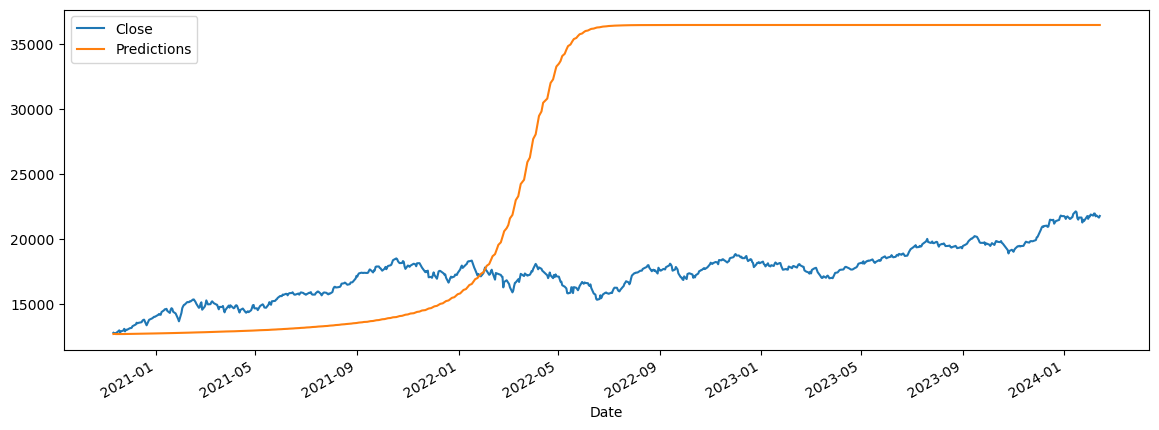

In [36]:
true_predictions = scaler.inverse_transform(test_predictions)
     

test['Predictions'] = true_predictions
     

test.plot(figsize=(14,5))
     

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Close'],test['Predictions']))
print(rmse)
     

12216.547333206845
